<a href="https://colab.research.google.com/github/adilmirzz/Image_Recognition_ML/blob/main/image_ai_bootcamp_devtown.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

day 1

what is image recongnition?eg:-tesla car learning to drive

what is deep learning?computer subset ai(ml(dl)));computer vision that identify and classify objects

what is a dataset?collect of data(text,num)etc

what preprocessing?we do again and again steps to perfection

what is EDA(exploratory data analysis?extract and transform

In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"adilmirzz","key":"ffc643e844cc9e412e73a1bd7bb059fc"}'}

In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [4]:
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hojjatk/mnist-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/mnist-dataset


In [6]:
import tensorflow as tf
(X_train,Y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
print(f"Train shap: {X_train.shape}, Test shape: {X_test.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Train shap: (60000, 28, 28), Test shape: (10000, 28, 28)


In [7]:
X_train = X_train / 255.0
X_test = X_test / 255.0
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)
print(f"Train reshaped: {X_train.shape}")

Train reshaped: (60000, 28, 28, 1)


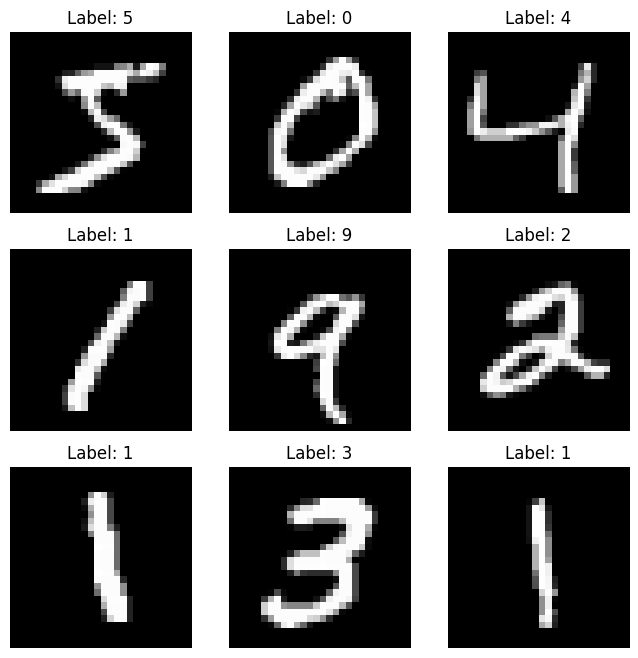

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(X_train[i].reshape(28,28),cmap='gray')
  plt.title(f"Label: {Y_train[i]}")
  plt.axis('off')
plt.show()


In [9]:
(X_train_c10, Y_train_c10), (X_test_c10,Y_test_c10) = tf.keras.datasets.cifar10.load_data()
X_train_c10 = X_train_c10 / 255.0
X_test_c10 = X_test_c10 / 255.0
print(f"CIFAR-10 train shape: {X_train_c10.shape}")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step
CIFAR-10 train shape: (50000, 32, 32, 3)


day 2

what is a convolutional neural network(cnn)?for designed for recognizing pattern in image

how does model training work?

why do we use dropout?preventing memorizing data(overfitting)

how to evaluate a model?accuracy on learning data

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten
model = Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(10,activation='softmax')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
history= model.fit(X_train,Y_train,epochs=5,batch_size=32,validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 47s 30ms/step - accuracy: 0.9016 - loss: 0.3234 - val_accuracy: 0.9802 - val_loss: 0.0685
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 80s 29ms/step - accuracy: 0.9854 - loss: 0.0482 - val_accuracy: 0.9861 - val_loss: 0.0511
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 29ms/step - accuracy: 0.9910 - loss: 0.0282 - val_accuracy: 0.9882 - val_loss: 0.0412
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 45s 30ms/step - accuracy: 0.9939 - loss: 0.0192 - val_accuracy: 0.9887 - val_loss: 0.0396
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 30ms/step - accuracy: 0.9954 - loss: 0.0149 - val_accuracy: 0.9885 - val_loss: 0.0451


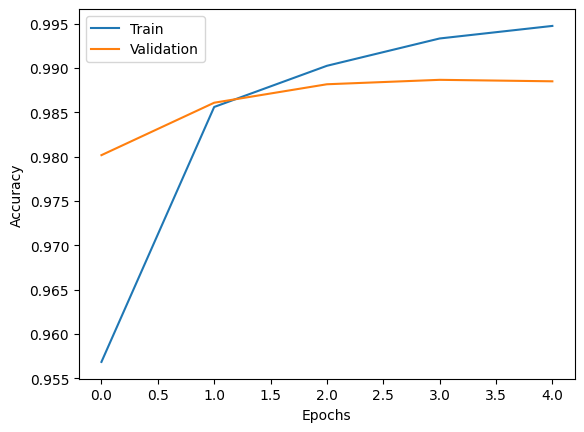

In [12]:
plt.plot(history.history['accuracy'],label='Train')
plt.plot(history.history['val_accuracy'],
         label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [13]:
test_loss,test_acc=model.evaluate(X_test,y_test)
print("Test Accuracy:{test_acc:.4f}")
Y_pred = model.predict(X_test).argmax(axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9846 - loss: 0.0453
Test Accuracy:{test_acc:.4f}
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


In [14]:
from tensorflow.keras.layers import Dropout
model = Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Dropout(0.25),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(10,activation='softmax')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

day 3

why deeper CNNs?


what is data augmentation?

what is advanced evaluation metrices?


In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(X_train_c10)

In [16]:
from tensorflow.keras.layers import BatchNormalization
model = Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(256,activation='relu'),
    Dropout(0.5),
    Dense(10,activation='softmax')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(datagen.flow(X_train_c10,Y_train_c10,batch_size=32),epochs=10,validation_data=(X_test_c10,Y_test_c10))

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 124s 78ms/step - accuracy: 0.3438 - loss: 1.7813 - val_accuracy: 0.5458 - val_loss: 1.2503
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 118s 76ms/step - accuracy: 0.5262 - loss: 1.3195 - val_accuracy: 0.5951 - val_loss: 1.1519
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 122s 78ms/step - accuracy: 0.5847 - loss: 1.1807 - val_accuracy: 0.5762 - val_loss: 1.2135
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 117s 75ms/step - accuracy: 0.6161 - loss: 1.0946 - val_accuracy: 0.6443 - val_loss: 1.0580
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 143s 75ms/step - accuracy: 0.6327 - loss: 1.0569 - val_accuracy: 0.6398 - val_loss: 1.0511
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 118s 75ms/step - accuracy: 0.6491 - loss: 1.0144 - val_accuracy: 0.6403 - val_loss: 1.0698
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 147s 79ms/step - accuracy: 0.6584 - loss: 0.9863 - val_accuracy: 0.6836 - val_loss: 0.9250
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 119s 76ms/step - accuracy: 0.6703 - lo

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step
              precision    recall  f1-score   support

           0       0.68      0.80      0.73      1000
           1       0.65      0.94      0.77      1000
           2       0.70      0.53      0.60      1000
           3       0.57      0.41      0.47      1000
           4       0.74      0.57      0.65      1000
           5       0.68      0.57      0.62      1000
           6       0.53      0.91      0.67      1000
           7       0.86      0.64      0.74      1000
           8       0.85      0.74      0.79      1000
           9       0.76      0.72      0.74      1000

    accuracy                           0.68     10000
   macro avg       0.70      0.68      0.68     10000
weighted avg       0.70      0.68      0.68     10000



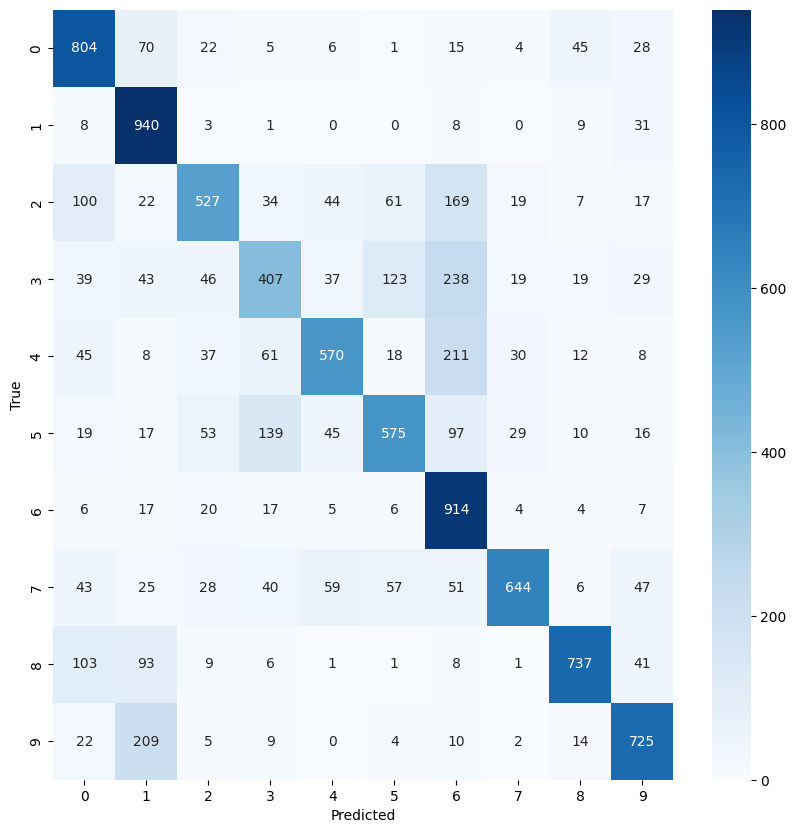

In [17]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
Ypred_c10 = model.predict(X_test_c10).argmax(axis=1)
cm=confusion_matrix(Y_test_c10,Ypred_c10)
print(classification_report(Y_test_c10,Ypred_c10))

import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

day 4

what are pre-trained model?mobileNetV2,resNet,VGG,ImageNet

what is transfer Learning?

how to fine-tune and optimize?unfreezeing all the layers of models

how to Deploy a Model?


In [18]:
!kaggle datasets download -d tongpython/cat-and-dog

Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
 90% 196M/218M [00:00<00:00, 464MB/s]  
100% 218M/218M [00:00<00:00, 379MB/s]


In [19]:
import zipfile
with zipfile.ZipFile('/content/cat-and-dog.zip','r') as zip_ref:
  zip_ref.extractall('/content/dogs-vs-cats')

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
Datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)
train_generator=Datagen.flow_from_directory('/content/dogs-vs-cats',target_size=(224,224),
                                            batch_size=32,class_mode='binary',subset='training')
val_generator=Datagen.flow_from_directory('/content/dogs-vs-cats',target_size=(224,224),
                                            batch_size=32,class_mode='binary',subset='validation')

Found 8023 images belonging to 2 classes.
Found 2005 images belonging to 2 classes.


In [21]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D
base_model = MobileNetV2(weights='imagenet',include_top=False,input_shape=(224,224,3))
base_model.trainable=False

model=Sequential([base_model,GlobalAveragePooling2D(),Dense(128,activation='relu'),Dense(1,activation='sigmoid')])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(train_generator,epochs=5,validation_data=val_generator)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 403s 2s/step - accuracy: 0.7781 - loss: 0.5638 - val_accuracy: 0.7985 - val_loss: 0.5155
Epoch 2/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 414s 2s/step - accuracy: 0.7990 - loss: 0.5014 - val_accuracy: 0.7985 - val_loss: 0.5096
Epoch 3/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 407s 2s/step - accuracy: 0.7994 - loss: 0.4873 - val_accuracy: 0.7985 - val_loss: 0.5315
Epoch 4/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 400s 2s/step - accuracy: 0.7971 - loss: 0.4832 - val_accuracy: 0.7985 - val_loss: 0.5201
Epoch 5/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 435s 2s/step - accuracy: 0.7971 - loss: 0.4612 - val_accuracy: 0.7980 - val_loss: 0.5342


In [22]:
base_model.trainable=True
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(train_generator,epochs=5,validation_data=val_generator)

Epoch 1/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 1657s 6s/step - accuracy: 0.8014 - loss: 0.5463 - val_accuracy: 0.7985 - val_loss: 2.7565
Epoch 2/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 1633s 7s/step - accuracy: 0.8004 - loss: 0.5130 - val_accuracy: 0.7985 - val_loss: 1.8702
Epoch 3/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 1597s 6s/step - accuracy: 0.7994 - loss: 0.5058 - val_accuracy: 0.7985 - val_loss: 0.8552
Epoch 4/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 1616s 6s/step - accuracy: 0.8012 - loss: 0.5081 - val_accuracy: 0.7985 - val_loss: 0.9563
Epoch 5/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 1609s 6s/step - accuracy: 0.8010 - loss: 0.5063 - val_accuracy: 0.7985 - val_loss: 0.5109


In [23]:
model.save('mobilenet_cats_dogs.h5')
#to load
import tensorflow as tf
loaded_model=tf.keras.models.load_model('mobilenet_cats_dogs.h5')


63/63 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step


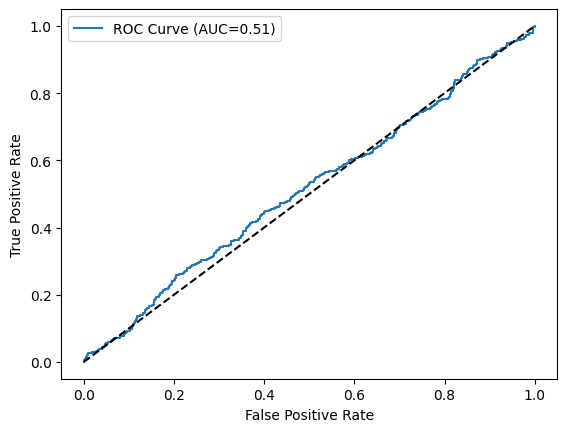

In [26]:
from sklearn.metrics import roc_curve,auc
Ypred_proba=loaded_model.predict(val_generator)
fpr,tpr,_=roc_curve(val_generator.classes,Ypred_proba)
roc_auc=auc(fpr,tpr)
plt.plot(fpr,tpr,label=f'ROC Curve (AUC={roc_auc:.2f})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

day 05

how to predict on New Data?


how to Create Portfolio Assets?

how to present Results?

In [39]:
from google.colab import files
uploaded = files.upload() #upload e.g. 'mycat.jpg'

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import numpy as np

img_path = 'download.jpg' #Replace with your filename
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

predictions = loaded_model.predict(img_array)
print("predicted class:", "Dog" if predictions[0] > 0.5 else "Cat")

Saving download.jpg to download (1).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
predicted class: Dog


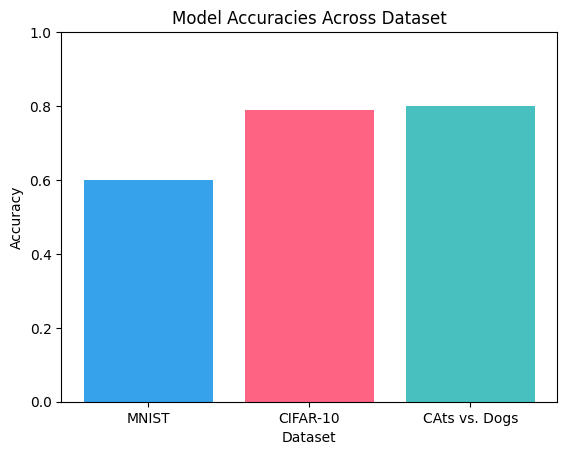

In [1]:
import matplotlib.pyplot as plt
dataset = ['MNIST','CIFAR-10', 'CAts vs. Dogs']
accuracies = [0.60,0.79,0.80]
plt.bar(dataset,accuracies,color=['#36A2EB','#FF6384','#48C0C0'])
plt.title('Model Accuracies Across Dataset')
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.show()